[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]
 [-2.28085963  0.74133045]
 [-2.82053775 -0.08946138]
 [-2.62614497  0.16338496]
 [-2.88638273 -0.57831175]
 [-2.6727558  -0.11377425]
 [-2.50694709  0.6450689 ]
 [-2.61275523  0.01472994]
 [-2.78610927 -0.235112  ]
 [-3.22380374 -0.51139459]
 [-2.64475039  1.17876464]
 [-2.38603903  1.33806233]
 [-2.62352788  0.81067951]
 [-2.64829671  0.31184914]
 [-2.19982032  0.87283904]
 [-2.5879864   0.51356031]
 [-2.31025622  0.39134594]
 [-2.54370523  0.43299606]
 [-3.21593942  0.13346807]
 [-2.30273318  0.09870885]
 [-2.35575405 -0.03728186]
 [-2.50666891 -0.14601688]
 [-2.46882007  0.13095149]
 [-2.56231991  0.36771886]
 [-2.63953472  0.31203998]
 [-2.63198939 -0.19696122]
 [-2.58739848 -0.20431849]
 [-2.4099325   0.41092426]
 [-2.64886233  0.81336382]
 [-2.59873675  1.09314576]
 [-2.63692688 -0.12132235]
 [-2.86624165  0.06936447]
 [-2.62523805  0.59937002]
 

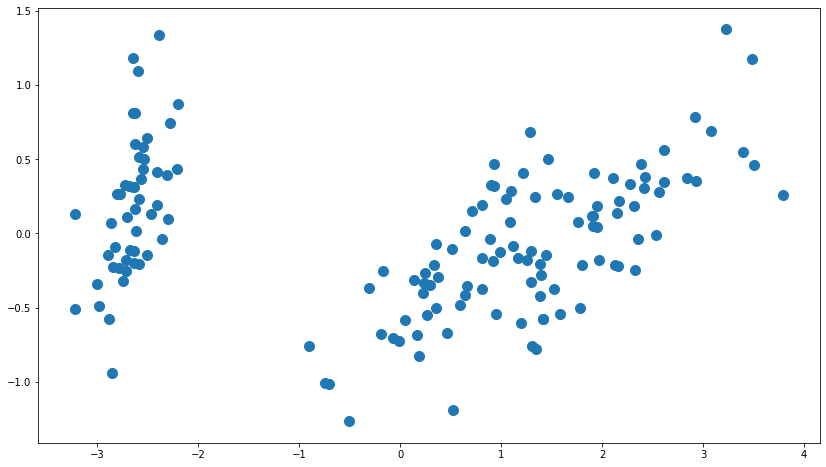

In [22]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline


def svd_flip(u, v):
    max_abs_cols = np.argmax(np.abs(u), axis=0)
    signs = np.sign(u[max_abs_cols, range(u.shape[1])])
    u *= signs
    v *= signs[:, np.newaxis]
    return u, v


class PCA(object):
    def __init__(self, k=1):
        assert k > 0
        self.k = k
        self.labels = []

    def fit_transform(self, X):
        # 用特征向量求
        """
        n_samples, n_features = X.shape   #获取样本数，样本维度
        mean = np.array([np.mean(X[:, i]) for i in range(n_features)])   #求出每个维度的平均值
        norm_X = X - mean   #将样本进行零均值化，即减去当前列（属性）的均值
        scatter_matrix = np.dot(np.transpose(norm_X), norm_X)/n_samples  #将零均值化后样本的转置矩阵 × 自己 ÷ 样本数，求出协方差矩阵
        eig_val, eig_vec = np.linalg.eig(scatter_matrix)   #求出协方差矩阵的特征值和特征向量
        eig_pairs = [(np.abs(eig_val[i]), eig_vec[:, i]) for i in range(n_features)]
        eig_pairs.sort(reverse=True)  #按照特征值绝对值的大小对特征值和特征向量从大到小排序
        feature = np.array([i[1] for i in eig_pairs[:k]])    #取方差最大的k个特征向量
        new_X = np.dot(norm_X, np.transpose(feature))    #将零均值化后样本 × 特征向量的转置矩阵，求出降维后的数据
        return new_X
        """

        #用奇异值求
        X = X - np.mean(X, axis=0)
        u, s, v = np.linalg.svd(X, full_matrices=False)
        u, v = svd_flip(u, v)
        new_X = np.dot(X, v[:k].T)
        return new_X


if __name__ == '__main__':
    iris = datasets.load_iris()
    dataset = iris.data
    k = 2

    my = PCA(k)
    newdata = my.fit_transform(dataset)

    # 绘图
    plt.figure(figsize=(14, 8))
    print(newdata)
    plt.scatter(newdata[:, 0], newdata[:, 1], marker='o', s=100)
    plt.show()